In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pylab as p
from collections import Counter
import re

#packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [6]:
da = pd.read_csv("NIFTY_2008.csv",parse_dates=True)
da


,Instrument,Date,Time,Open,High,Low,Close
0,NIFTY,20080101,09:55,6138.60,6154.60,6138.60,6148.90
1,NIFTY,20080101,09:56,6149.75,6149.75,6132.80,6132.80
2,NIFTY,20080101,09:57,6138.25,6138.25,6127.95,6127.95
3,NIFTY,20080101,09:58,6127.15,6127.15,6120.90,6120.90
4,NIFTY,20080101,09:59,6118.05,6118.05,6113.55,6113.90
...,...,...,...,...,...,...,...
79537,NIFTY,20081231,15:25,2963.85,2964.15,2962.80,2963.95
79538,NIFTY,20081231,15:26,2964.25,2964.25,2962.15,2962.15
79539,NIFTY,20081231,15:27,2962.20,2962.20,2960.15,2960.15
79540,NIFTY,20081231,15:28,2959.25,2959.25,2956.80,2957.85


In [12]:
#making date and time column into one column
dm=da["Date"].astype(str)+da["Time"].astype(str)
dm

da['dm']=dm
da

,Instrument,Date,Time,Open,High,Low,Close,dm
0,NIFTY,20080101,09:55,6138.60,6154.60,6138.60,6148.90,2008010109:55
1,NIFTY,20080101,09:56,6149.75,6149.75,6132.80,6132.80,2008010109:56
2,NIFTY,20080101,09:57,6138.25,6138.25,6127.95,6127.95,2008010109:57
3,NIFTY,20080101,09:58,6127.15,6127.15,6120.90,6120.90,2008010109:58
4,NIFTY,20080101,09:59,6118.05,6118.05,6113.55,6113.90,2008010109:59
...,...,...,...,...,...,...,...,...
79537,NIFTY,20081231,15:25,2963.85,2964.15,2962.80,2963.95,2008123115:25
79538,NIFTY,20081231,15:26,2964.25,2964.25,2962.15,2962.15,2008123115:26
79539,NIFTY,20081231,15:27,2962.20,2962.20,2960.15,2960.15,2008123115:27
79540,NIFTY,20081231,15:28,2959.25,2959.25,2956.80,2957.85,2008123115:28


In [21]:
#adding another column in our dataset in the right date and time format
da["DateTime"] = pd.to_datetime(da.dm, format="%Y%m%d%H:%M")

print(da)



                    Instrument      Date   Time     Open     High      Low  \
DateTime                                                                     
2008-01-01 09:55:00      NIFTY  20080101  09:55  6138.60  6154.60  6138.60   
2008-01-01 09:56:00      NIFTY  20080101  09:56  6149.75  6149.75  6132.80   
2008-01-01 09:57:00      NIFTY  20080101  09:57  6138.25  6138.25  6127.95   
2008-01-01 09:58:00      NIFTY  20080101  09:58  6127.15  6127.15  6120.90   
2008-01-01 09:59:00      NIFTY  20080101  09:59  6118.05  6118.05  6113.55   
...                        ...       ...    ...      ...      ...      ...   
2008-12-31 15:25:00      NIFTY  20081231  15:25  2963.85  2964.15  2962.80   
2008-12-31 15:26:00      NIFTY  20081231  15:26  2964.25  2964.25  2962.15   
2008-12-31 15:27:00      NIFTY  20081231  15:27  2962.20  2962.20  2960.15   
2008-12-31 15:28:00      NIFTY  20081231  15:28  2959.25  2959.25  2956.80   
2008-12-31 15:29:00      NIFTY  20081231  15:29  2957.20  2958.5

In [14]:
#setting the new column as index
da = da.set_index("DateTime")

In [15]:
da

,Instrument,Date,Time,Open,High,Low,Close,dm
DateTime,,,,,,,,
2008-01-01 09:55:00,NIFTY,20080101,09:55,6138.60,6154.60,6138.60,6148.90,2008010109:55
2008-01-01 09:56:00,NIFTY,20080101,09:56,6149.75,6149.75,6132.80,6132.80,2008010109:56
2008-01-01 09:57:00,NIFTY,20080101,09:57,6138.25,6138.25,6127.95,6127.95,2008010109:57
2008-01-01 09:58:00,NIFTY,20080101,09:58,6127.15,6127.15,6120.90,6120.90,2008010109:58
2008-01-01 09:59:00,NIFTY,20080101,09:59,6118.05,6118.05,6113.55,6113.90,2008010109:59
...,...,...,...,...,...,...,...,...
2008-12-31 15:25:00,NIFTY,20081231,15:25,2963.85,2964.15,2962.80,2963.95,2008123115:25
2008-12-31 15:26:00,NIFTY,20081231,15:26,2964.25,2964.25,2962.15,2962.15,2008123115:26
2008-12-31 15:27:00,NIFTY,20081231,15:27,2962.20,2962.20,2960.15,2960.15,2008123115:27


<class 'pandas.core.frame.DataFrame'>
                       Close
DateTime                    
2008-01-01 09:55:00  6148.90
2008-01-01 09:56:00  6132.80
2008-01-01 09:57:00  6127.95
2008-01-01 09:58:00  6120.90
2008-01-01 09:59:00  6113.90


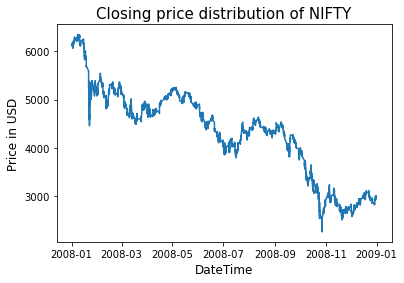

In [23]:
#plotting the timeseries
data = da['Close']
Date_col = da['DateTime']
train = da[['DateTime','Close']]

# Setting the Date as Index
train1 = train.set_index('DateTime')
train1.sort_index(inplace=True)
print (type(train1))
print (train1.head())
plt.plot(train1)
plt.xlabel('DateTime', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of NIFTY", fontsize=15)
plt.show()

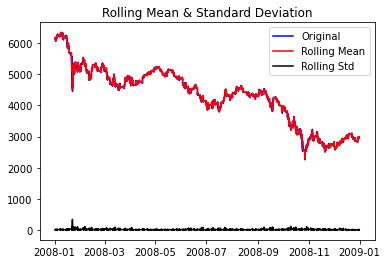

ADF Stastistic: -1.376677
p-value: 0.593405
The graph is non stationery
Critical values:
	1%: -3.430 
	5%: -2.862 
	10%: -2.567 


In [28]:
#Augmented Dicky Fuller Test:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):
    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
        if result[0]>value:
            print("The graph is non stationery")
            break
        else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = train1['Close']      
test_stationarity(ts)

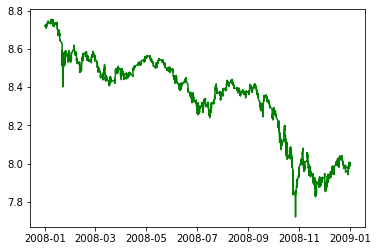

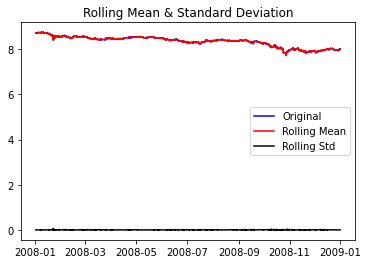

ADF Stastistic: -1.024656
p-value: 0.744166
The graph is non stationery
Critical values:
	1%: -3.430 
	5%: -2.862 
	10%: -2.567 


In [30]:
#log-transforming the series
ts_log = np.log(ts)
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

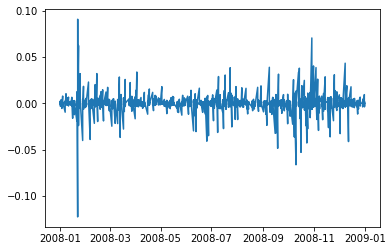

In [31]:
#removing trend and seasonality
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

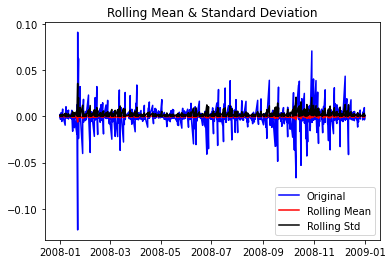

ADF Stastistic: -39.331155
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.430 
	5%: -2.862 
	10%: -2.567 


In [32]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

<function matplotlib.pyplot.show(close=None, block=None)>

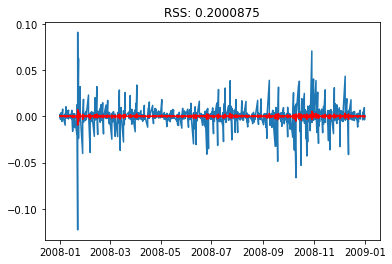

In [38]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show

Printing Predicted vs Expected Values...


predicted = 2952.518756,   expected = 2956.900000,   error = 0.148170  %
predicted = 2957.262227,   expected = 2950.700000,   error = 0.222396  %
predicted = 2949.989222,   expected = 2954.100000,   error = 0.139155  %
predicted = 2954.644549,   expected = 2954.500000,   error = 0.004893  %
predicted = 2954.336604,   expected = 2958.050000,   error = 0.125535  %
predicted = 2958.280207,   expected = 2958.600000,   error = 0.010809  %
predicted = 2958.440894,   expected = 2958.200000,   error = 0.008143  %
predicted = 2958.115231,   expected = 2962.450000,   error = 0.146324  %
predicted = 2962.774336,   expected = 2964.200000,   error = 0.048096  %
predicted = 2964.099646,   expected = 2965.250000,   error = 0.038794  %
predicted = 2965.218815,   expected = 2966.250000,   error = 0.034764  %
predicted = 2966.249521,   expected = 2964.100000,   error = 0.072519  %
predicted = 2963.856920,   expected = 2963.500000,   error = 0.012044  %
predicte

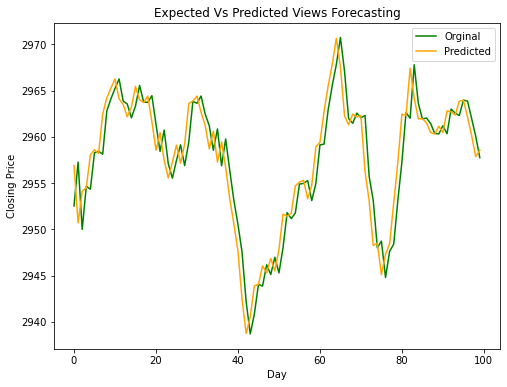

In [37]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions=list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
#  apply ARIMA model over each values and calculate the predicted value and calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plt.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()

In [40]:
#organising the data only in 60 min intervals to make it more presentable and concise
t = da.groupby(pd.Grouper(freq='60Min')).agg({"Open": "first", 
                                             "Close": "last", 
                                             "Low": "min", 
                                             "High": "max"})

t

,Open,Close,Low,High
DateTime,,,,
2008-01-01 09:00:00,6138.60,6113.90,6113.55,6154.60
2008-01-01 10:00:00,6114.05,6135.30,6110.50,6143.15
2008-01-01 11:00:00,6136.15,6142.70,6128.90,6146.85
2008-01-01 12:00:00,6141.60,6158.20,6140.80,6159.60
2008-01-01 13:00:00,6158.05,6156.05,6151.75,6164.85
...,...,...,...,...
2008-12-31 11:00:00,2979.70,2984.00,2974.80,3002.05
2008-12-31 12:00:00,2984.40,2990.30,2982.05,2996.90
2008-12-31 13:00:00,2990.35,2965.25,2949.50,3001.00


In [41]:
#dropping all values with "na"
t = t.dropna()

In [42]:
t

,Open,Close,Low,High
DateTime,,,,
2008-01-01 09:00:00,6138.60,6113.90,6113.55,6154.60
2008-01-01 10:00:00,6114.05,6135.30,6110.50,6143.15
2008-01-01 11:00:00,6136.15,6142.70,6128.90,6146.85
2008-01-01 12:00:00,6141.60,6158.20,6140.80,6159.60
2008-01-01 13:00:00,6158.05,6156.05,6151.75,6164.85
...,...,...,...,...
2008-12-31 11:00:00,2979.70,2984.00,2974.80,3002.05
2008-12-31 12:00:00,2984.40,2990.30,2982.05,2996.90
2008-12-31 13:00:00,2990.35,2965.25,2949.50,3001.00


<AxesSubplot:xlabel='DateTime'>

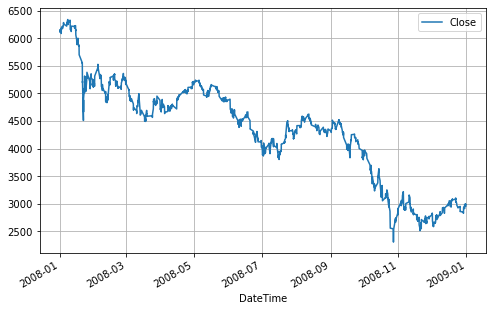

In [43]:
#plotting the closing price of the stock in 60min intervals
t[['Close']].plot(grid=True,figsize=(8,5))

In [44]:
#sma at 5
long_rolling = t.rolling(window=5).mean()
long_rolling.tail()

,Open,Close,Low,High
DateTime,,,,
2008-12-31 11:00:00,2981.14,2983.55,2965.21,2999.19
2008-12-31 12:00:00,2985.86,2983.94,2970.87,2999.87
2008-12-31 13:00:00,2986.28,2983.33,2969.15,3000.46
2008-12-31 14:00:00,2983.54,2976.23,2960.89,2994.68
2008-12-31 15:00:00,2976.46,2972.05,2957.91,2988.01


In [45]:
#sma at 8
short_rolling = da.rolling(window=8).mean()
short_rolling.head()

,Date,Open,High,Low,Close
DateTime,,,,,
2008-01-01 09:55:00,NaN,NaN,NaN,NaN,NaN
2008-01-01 09:56:00,NaN,NaN,NaN,NaN,NaN
2008-01-01 09:57:00,NaN,NaN,NaN,NaN,NaN
2008-01-01 09:58:00,NaN,NaN,NaN,NaN,NaN
2008-01-01 09:59:00,NaN,NaN,NaN,NaN,NaN


In [46]:
# adding new columns with ema at 5,8,13 in our dataset

t['FIVE'] = t.Close.ewm(span=5, adjust=False).mean()
t['EIGHT'] =  t.Close.ewm(span=8, adjust=False).mean() 
t['THIRTEEN'] =  t.Close.ewm(span=13, adjust=False).mean() 
t

,Open,Close,Low,High,FIVE,EIGHT,THIRTEEN
DateTime,,,,,,,
2008-01-01 09:00:00,6138.60,6113.90,6113.55,6154.60,6113.900000,6113.900000,6113.900000
2008-01-01 10:00:00,6114.05,6135.30,6110.50,6143.15,6121.033333,6118.655556,6116.957143
2008-01-01 11:00:00,6136.15,6142.70,6128.90,6146.85,6128.255556,6123.998765,6120.634694
2008-01-01 12:00:00,6141.60,6158.20,6140.80,6159.60,6138.237037,6131.599040,6126.001166
2008-01-01 13:00:00,6158.05,6156.05,6151.75,6164.85,6144.174691,6137.032586,6130.293857
...,...,...,...,...,...,...,...
2008-12-31 11:00:00,2979.70,2984.00,2974.80,3002.05,2976.528002,2965.426008,2950.987620
2008-12-31 12:00:00,2984.40,2990.30,2982.05,2996.90,2981.118668,2970.953562,2956.603674
2008-12-31 13:00:00,2990.35,2965.25,2949.50,3001.00,2975.829112,2969.686103,2957.838863


In [47]:
FIVE = da.Close.ewm(span=5, adjust=False).mean()

EIGHT = da.Close.ewm(span=8, adjust=False).mean() 

THIRTEEN = da.Close.ewm(span=13, adjust=False).mean() 

In [17]:
FIVE

DateTime
2008-01-01 09:55:00    6148.900000
2008-01-01 09:56:00    6143.533333
2008-01-01 09:57:00    6138.338889
2008-01-01 09:58:00    6132.525926
2008-01-01 09:59:00    6126.317284
                          ...     
2008-12-31 15:25:00    2963.084819
2008-12-31 15:26:00    2962.773213
2008-12-31 15:27:00    2961.898809
2008-12-31 15:28:00    2960.549206
2008-12-31 15:29:00    2959.882804
Name: Close, Length: 79542, dtype: float64

<AxesSubplot:xlabel='DateTime'>

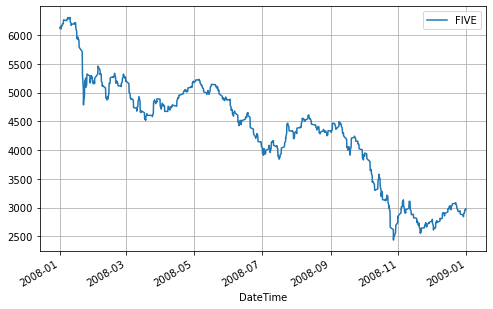

In [18]:
t[['FIVE']].plot(grid=True,figsize=(8,5))


<AxesSubplot:xlabel='DateTime'>

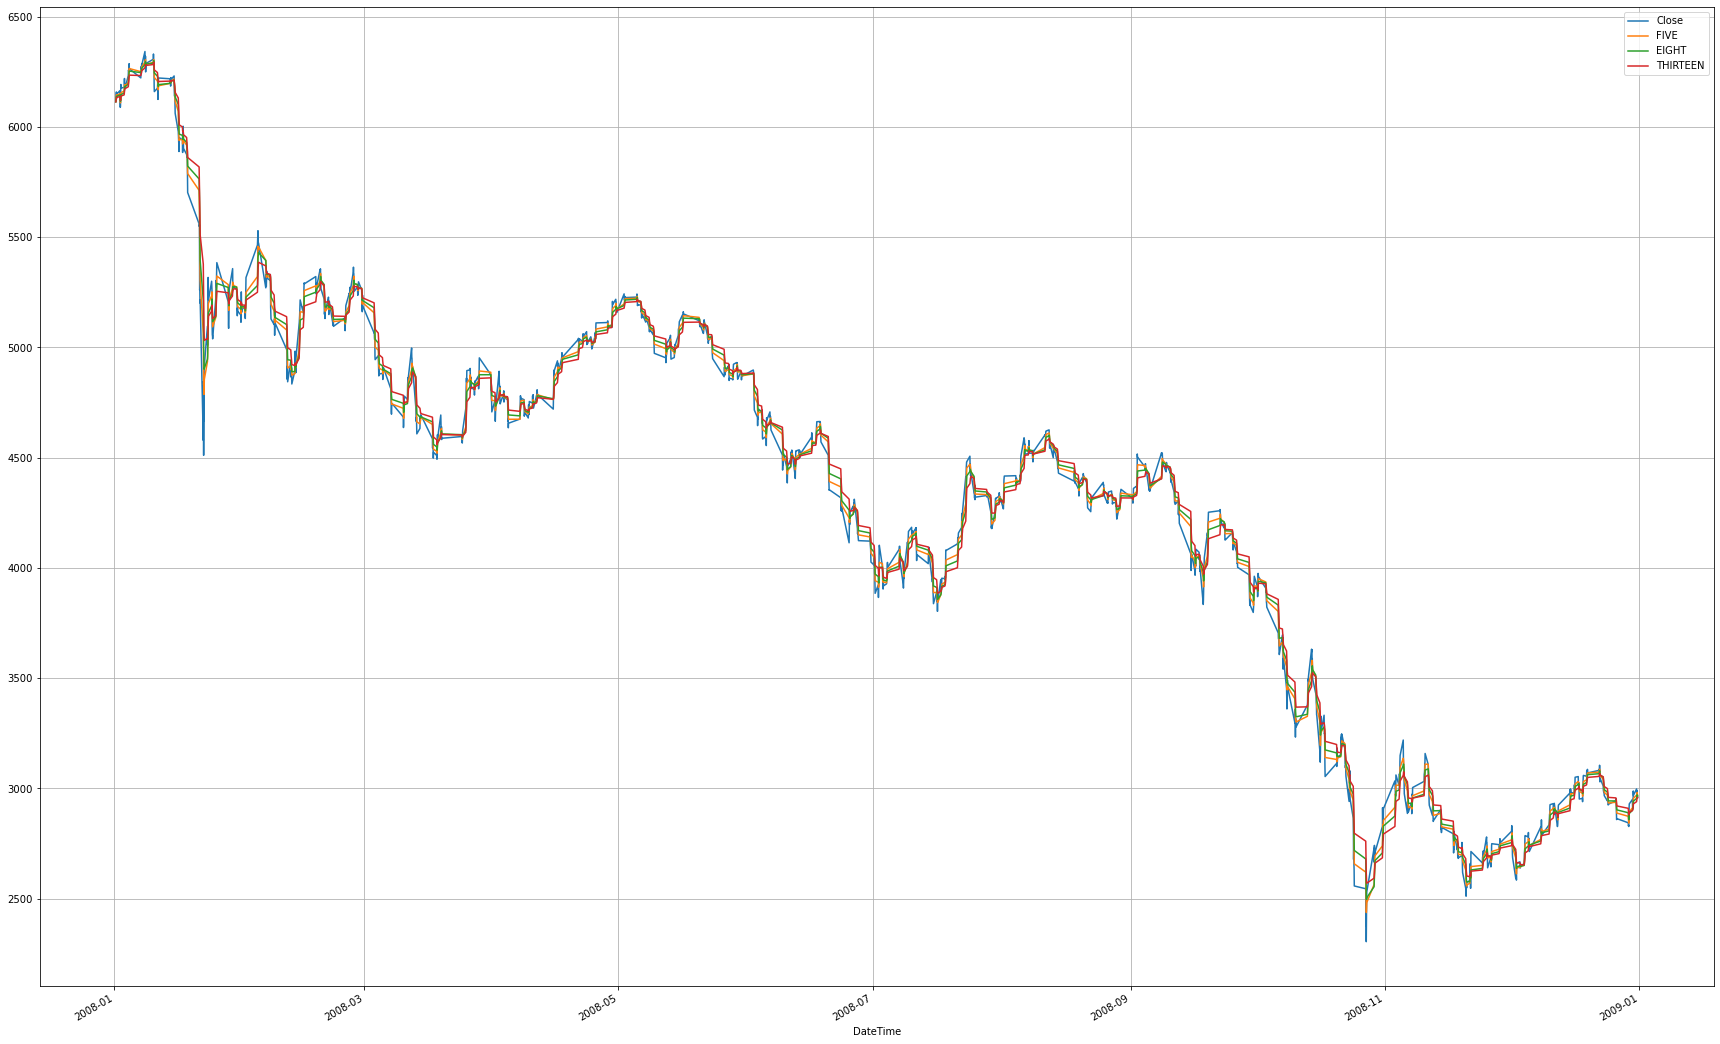

In [19]:
#plotting 'Close','FIVE','EIGHT','THIRTEEN'
t[['Close','FIVE','EIGHT','THIRTEEN']].plot(grid=True,figsize=(30,20))